In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
data = pd.read_csv('health_care_diabetes_raw.csv')

In [4]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape


(768, 9)

# Project Task: Week 1 -- Data Exploration and Missing Values Treatment


In [6]:
#Checking for null values in Dataset
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Since the 0 value in Glucose,BloodPressure,SkinThickness,Insulin and BMI variables represent missing values.Lets find now many instances are there in each of the above variables

In [7]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
(5/765)*100
#only 0.6% of data is having missing values in Glucose column. No need to worry we can ignore them

0.6535947712418301

In [9]:
(data[data['BloodPressure']==0]).shape

(35, 9)

In [10]:
 (35/765)*100
#4.5% of data is having missing values in BloodPressure column

4.57516339869281

In [11]:
(data[data['SkinThickness']==0]).shape

(227, 9)

In [13]:
(227/765)*100
#29.6% of data is having missing values in SkinThickness column

29.673202614379086

In [29]:
(data[data['Insulin']==0]).shape

(0, 9)

In [30]:
(374/765)*100
#~49% of data is having missing values in Insulin column


48.888888888888886

In [31]:
(data[data['BMI']==0]).shape


(11, 9)

In [17]:
(11/765)*100
#1.4% of data is having missing values in BMI column

1.4379084967320261

### Since Insulin and SkinThickness are having higher percentages of missing values lets try to fill up the missing values

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

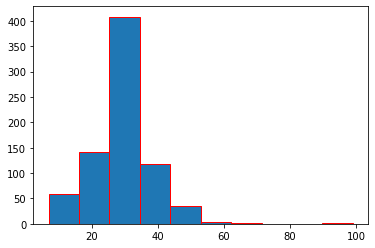

In [32]:
plt.hist(data['SkinThickness'],edgecolor='red')


In [33]:
data[data['SkinThickness']!=0]['SkinThickness'].describe()


count    768.000000
mean      29.153420
std        8.790942
min        7.000000
25%       25.000000
50%       29.153420
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

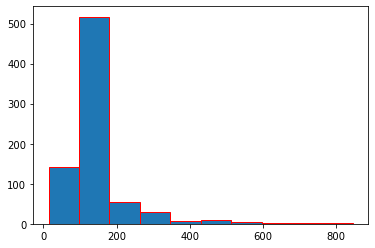

In [34]:
plt.hist(data['Insulin'],edgecolor='red')

In [35]:
data[data['Insulin']!=0]['Insulin'].describe()


count    768.000000
mean     155.548223
std       85.021108
min       14.000000
25%      121.500000
50%      155.548223
75%      155.548223
max      846.000000
Name: Insulin, dtype: float64

### Mean value of Skinthickness is ~29 and the mean value of Insulin is ~155 let impute the missing values with means

In [36]:
from numpy import nan
dataset_imputed = data
dataset_imputed[['SkinThickness','Insulin']] = dataset_imputed[['SkinThickness','Insulin']].replace(0, nan)


In [37]:
 dataset_imputed.fillna(dataset_imputed.mean(), inplace=True)

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

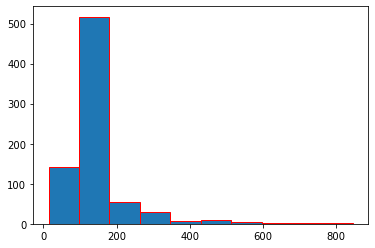

In [38]:
 plt.hist(dataset_imputed['Insulin'],edgecolor='red')


In [39]:
 data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
dataset_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
dataset_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [43]:
 Positive = dataset_imputed[dataset_imputed['Outcome']==1]
Positive.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
6,3,78,50,32.00000,88.000000,31.0,0.248,26,1
8,2,197,70,45.00000,543.000000,30.5,0.158,53,1


In [44]:
 Negative = dataset_imputed[dataset_imputed['Outcome']==0]
Negative.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
5,5,116,74,29.15342,155.548223,25.6,0.201,30,0
7,10,115,0,29.15342,155.548223,35.3,0.134,29,0
10,4,110,92,29.15342,155.548223,37.6,0.191,30,0


In [53]:
 dataset_imputed['Glucose'].value_counts().head(5)


99     17
100    17
111    14
129    14
125    14
Name: Glucose, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

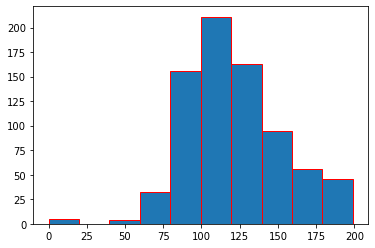

In [54]:
 plt.hist(dataset_imputed['Glucose'],edgecolor='red')

In [55]:
dataset_imputed['BloodPressure'].value_counts().head(7)

70    57
74    52
78    45
68    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

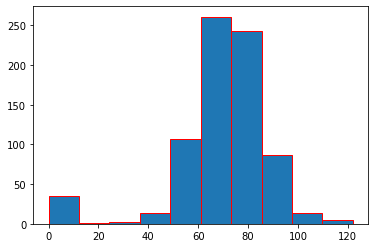

In [56]:
plt.hist(dataset_imputed['BloodPressure'],edgecolor='red')


In [57]:
dataset_imputed['SkinThickness'].value_counts().head(7)

29.15342    227
32.00000     31
30.00000     27
27.00000     23
23.00000     22
33.00000     20
28.00000     20
Name: SkinThickness, dtype: int64

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

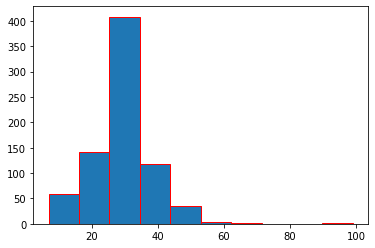

In [58]:
plt.hist(dataset_imputed['SkinThickness'],edgecolor='red')

In [59]:
dataset_imputed['Insulin'].value_counts().head(7)


155.548223    374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
94.000000       7
180.000000      7
Name: Insulin, dtype: int64

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

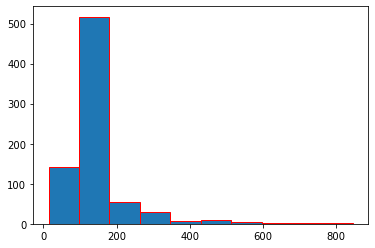

In [60]:
plt.hist(dataset_imputed['Insulin'],edgecolor='red')


In [61]:
dataset_imputed['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
33.3    10
30.1     9
Name: BMI, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

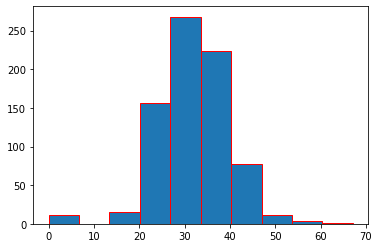

In [62]:
plt.hist(dataset_imputed['BMI'],edgecolor='red')

In [63]:
dataset_imputed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.250000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.000000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


# Project Task: Week 2 -- Corelation Analysis and Scatter Plots

In [64]:
Positive.shape

(268, 9)

In [65]:
Negative.shape

(500, 9)

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 [<matplotlib.patches.Polygon at 0x258c736c940>])

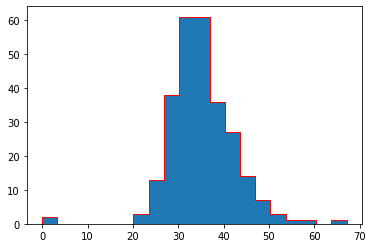

In [66]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20,edgecolor='red')


In [67]:
Positive['BMI'].value_counts().head(7)

32.9    8
31.6    7
33.3    6
31.2    5
30.5    5
32.0    5
34.3    4
Name: BMI, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 [<matplotlib.patches.Polygon at 0x258c73df340>])

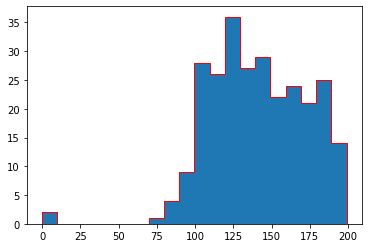

In [68]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20,edgecolor='red')


In [69]:
 Positive['Glucose'].value_counts().head(7)


125    7
128    6
129    6
115    6
158    6
146    5
124    5
Name: Glucose, dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 [<matplotlib.patches.Polygon at 0x258c7440d60>])

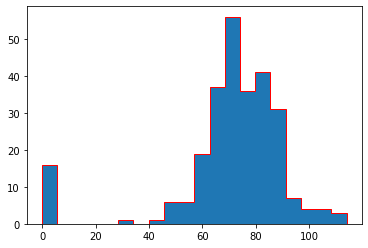

In [70]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20,edgecolor='red')


In [72]:
Positive['BloodPressure'].value_counts().head(7)

70    23
76    18
78    17
74    17
72    16
0     16
80    13
Name: BloodPressure, dtype: int64

(array([  1.,   5.,  11.,  21., 113.,  41.,  34.,  20.,  15.,   4.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 7. , 11.6, 16.2, 20.8, 25.4, 30. , 34.6, 39.2, 43.8, 48.4, 53. ,
        57.6, 62.2, 66.8, 71.4, 76. , 80.6, 85.2, 89.8, 94.4, 99. ]),
 [<matplotlib.patches.Polygon at 0x258c74a7d90>])

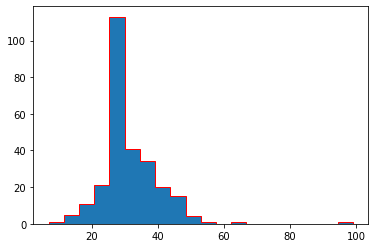

In [73]:
 plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20,edgecolor='red')


In [74]:
Positive['SkinThickness'].value_counts().head(7)

29.15342    88
32.00000    14
30.00000     9
33.00000     9
39.00000     8
37.00000     8
36.00000     8
Name: SkinThickness, dtype: int64

(array([  4.,  12.,  27., 169.,  18.,  10.,   8.,   5.,   2.,   1.,   1.,
          6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 [<matplotlib.patches.Polygon at 0x258c750f3d0>])

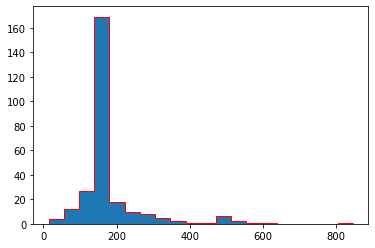

In [75]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20,edgecolor='red')

In [76]:
Positive['Insulin'].value_counts().head(7)

155.548223    138
130.000000      6
180.000000      4
175.000000      3
156.000000      3
185.000000      2
194.000000      2
Name: Insulin, dtype: int64

### Scatter Plots

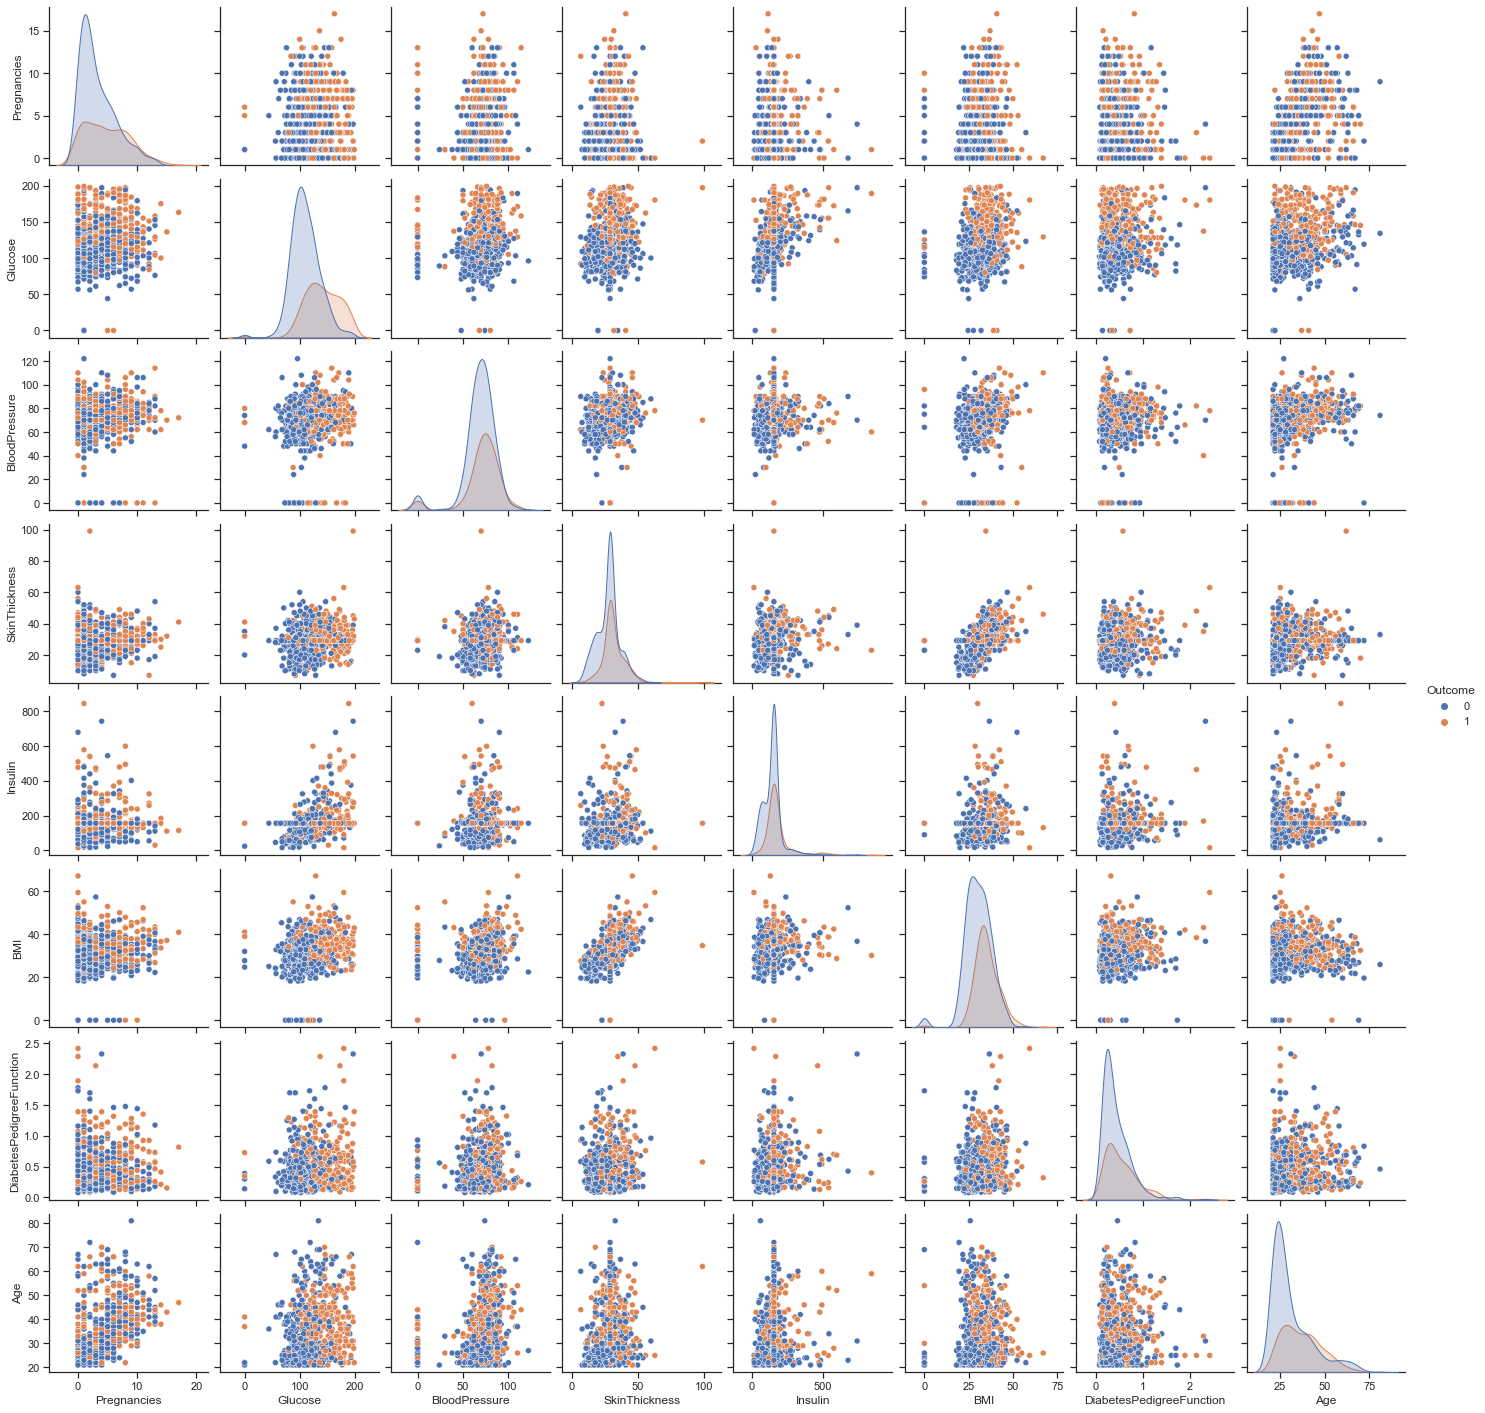

In [78]:
#Pair plots for all dataset
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset_imputed,hue="Outcome")

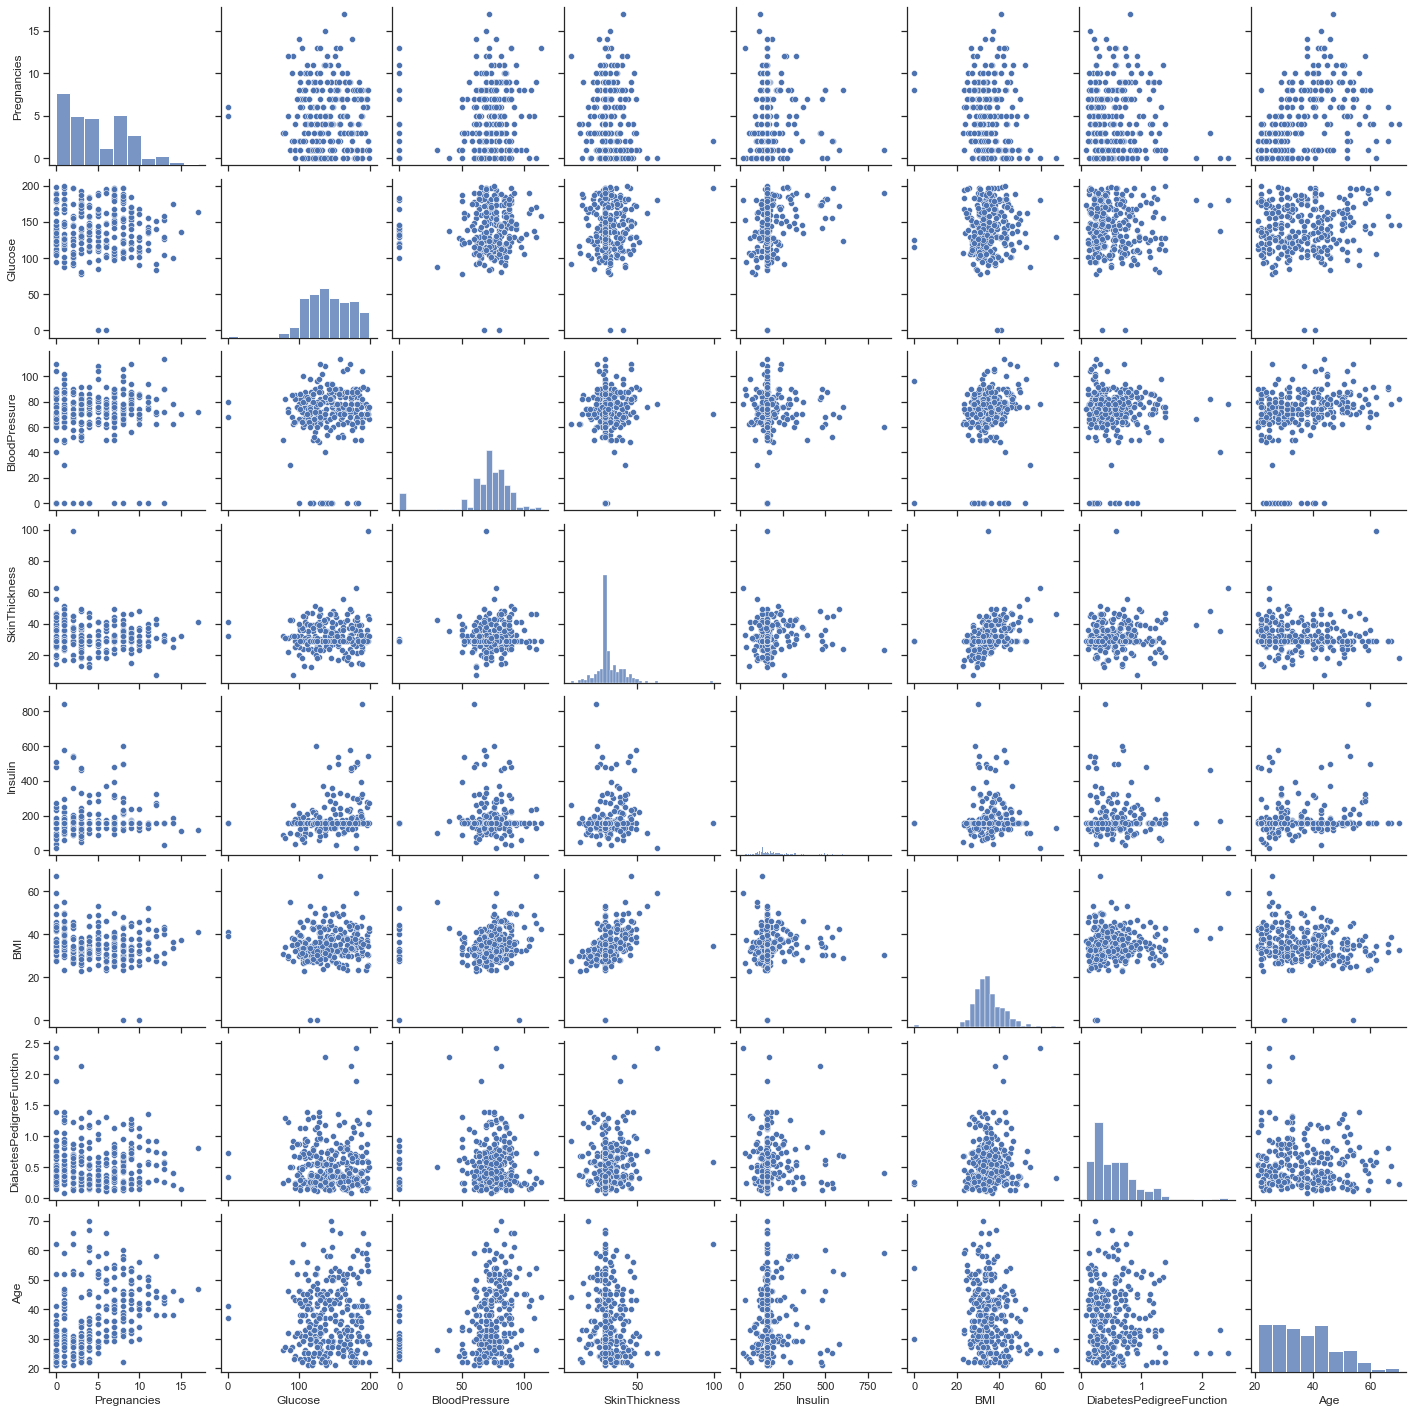

In [84]:
#Pair plots for all Positive cases
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Positive[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

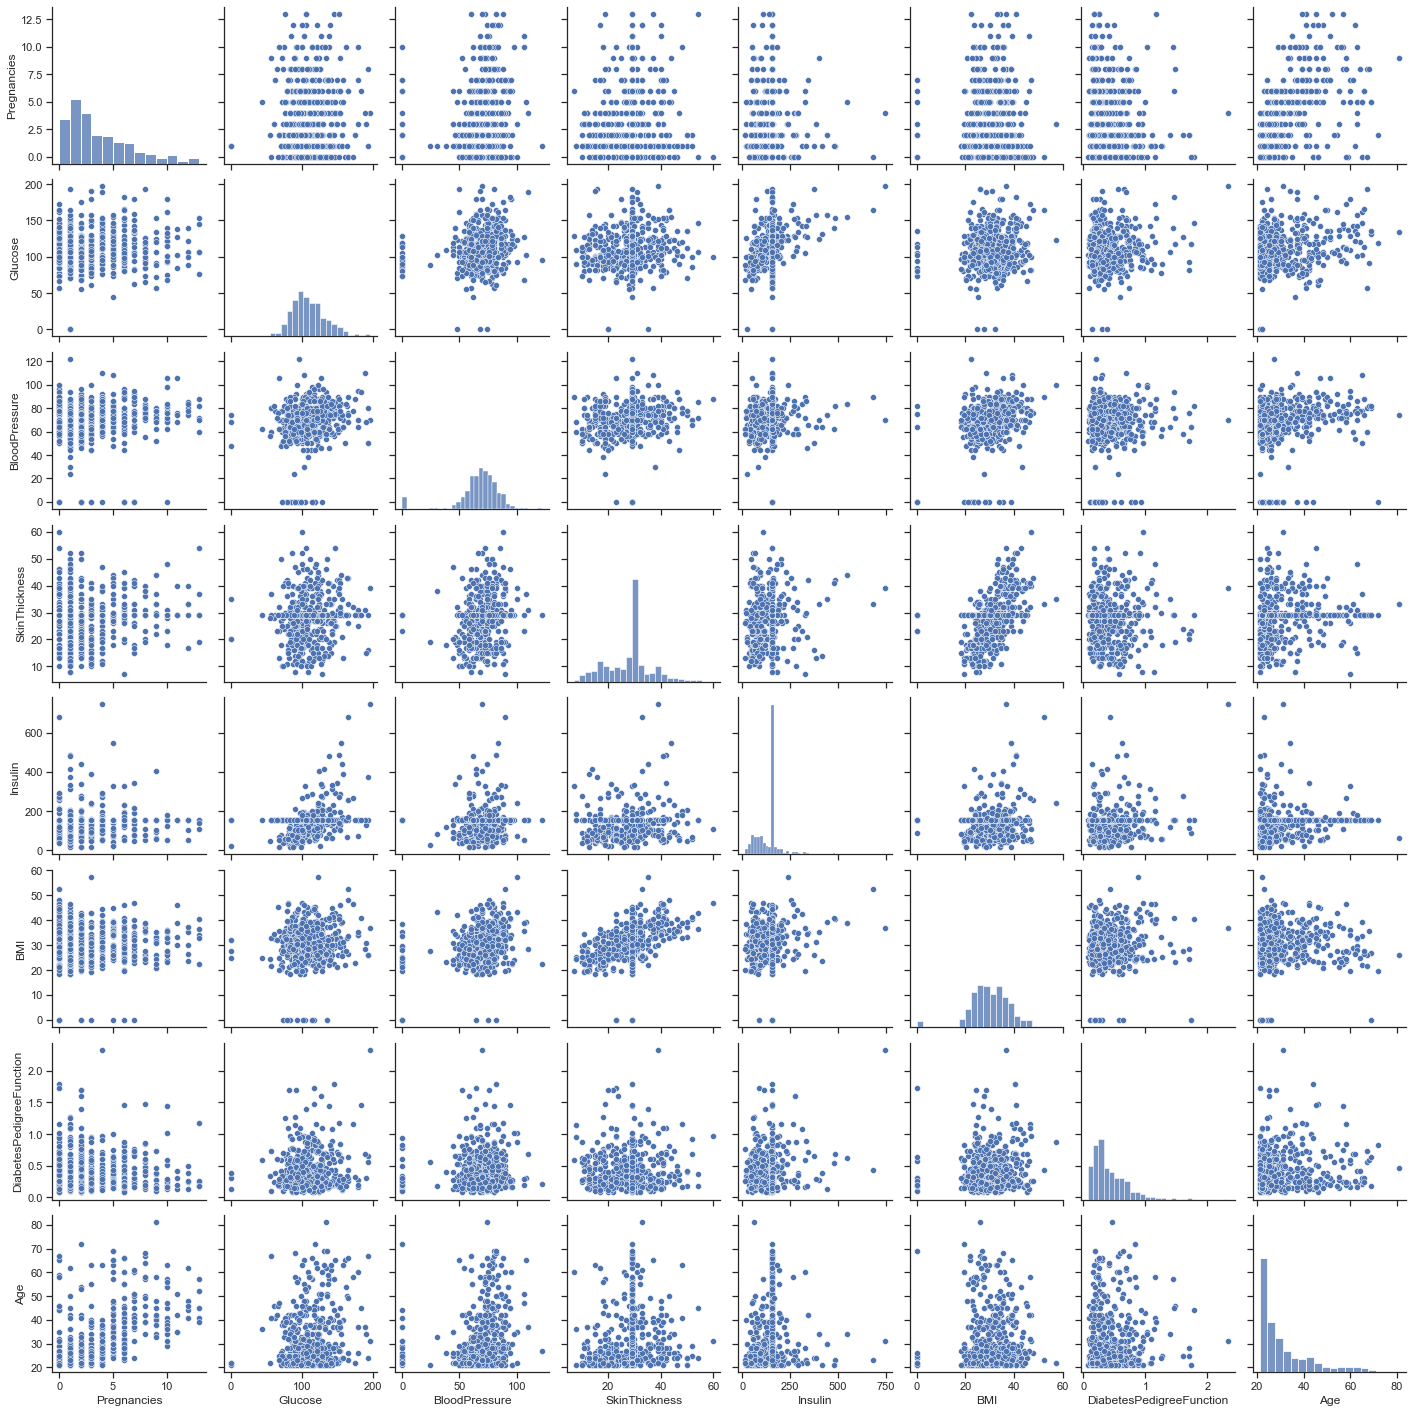

In [86]:
 #Pair plots for all Negative cases
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Negative[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

### Correlation Analysis and Heat map

In [87]:
# correlation matrix
dataset_imputed.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.082989,0.056027,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.182455,0.407699,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.123444,0.045319,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.082989,0.182455,0.123444,1.000000,0.158139,0.480496,0.100966,0.127872,0.215299
Insulin,0.056027,0.407699,0.045319,0.158139,1.000000,0.149468,0.098634,0.136734,0.214411
BMI,0.017683,0.221071,0.281805,0.480496,0.149468,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.100966,0.098634,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.127872,0.136734,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.215299,0.214411,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

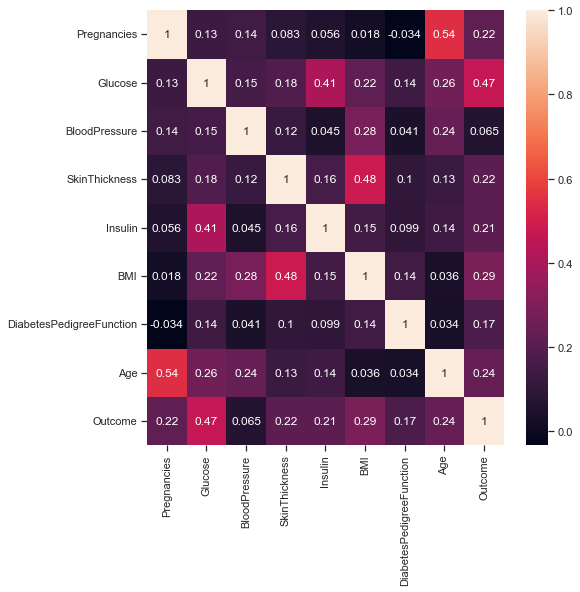

In [88]:
plt.subplots(figsize=(8,8))
sns.heatmap(dataset_imputed.corr(),annot=True)

## Correlation Results :
### There are not much multicolinearity
### Pregnancies and Age have some positive corelation
### Glucose has some postive corelation with the outcome variable
### Skin thickness and BMI has some positive corelation
### Insulin and Glucose has some positive corelation


# Project Task: Week 3 and Week 4 -- Data Modelling and Model Performance Evaluation

## Model 1 : Logistic Regression

In [89]:
dataset_imputed.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [94]:
 features = dataset_imputed.iloc[:,[0,1,2,3,4,5,6,7]].values
label = dataset_imputed.iloc[:,8].values


In [95]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state =10)


In [96]:
 #Create model
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train,y_train)

LogisticRegression()

In [97]:
print(logRegModel.score(X_train,y_train))
print(logRegModel.score(X_test,y_test))

0.7719869706840391
0.7597402597402597


In [98]:
y_pred = logRegModel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logRegModel.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.76


In [99]:
 from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[86  9]
 [28 31]]


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.78      0.53      0.63        59

    accuracy                           0.76       154
   macro avg       0.76      0.72      0.72       154
weighted avg       0.76      0.76      0.75       154



AUC: 0.715


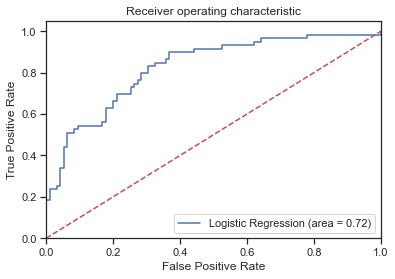

In [101]:
 from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % logit_roc_auc)
plt.show()


## Model 2 : Decision Tree Classifier
 

In [103]:
 #Hyper Parameter tuning of max_dept
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
for i in range(3,20):print("For max_depth = ",i)
 DTModel = DecisionTreeClassifier(max_depth=i)
 DTModel.fit(X_train,y_train)
 y_pred = DTModel.predict(X_test)
 print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

For max_depth =  3
For max_depth =  4
For max_depth =  5
For max_depth =  6
For max_depth =  7
For max_depth =  8
For max_depth =  9
For max_depth =  10
For max_depth =  11
For max_depth =  12
For max_depth =  13
For max_depth =  14
For max_depth =  15
For max_depth =  16
For max_depth =  17
For max_depth =  18
For max_depth =  19
Accuracy: 0.7077922077922078


#### Highest Accuracy of Decision Tree Model can be obtained on Max_Depth = 10

In [104]:
DTModel = DecisionTreeClassifier(max_depth=10)
DTModel.fit(X_train,y_train)
y_pred = DTModel.predict(X_test)


In [105]:
 DTModel.score(X_train,y_train)

0.9267100977198697

In [106]:
DTModel.score(X_test,y_test)


0.7402597402597403

In [107]:
print('Accuracy of Decision Tree regression classifier on test set: {:.2f}'.format(DTModel.score(X_test, y_test)))


Accuracy of Decision Tree regression classifier on test set: 0.74


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[76 19]
 [21 38]]


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        95
           1       0.67      0.64      0.66        59

    accuracy                           0.74       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [110]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.6666666666666666


In [111]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.6440677966101694


AUC: 0.722


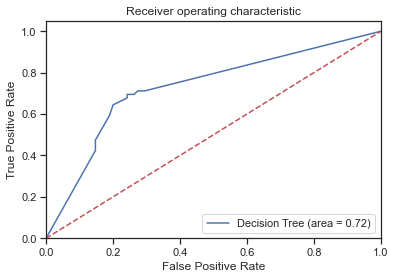

In [112]:
 from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, DTModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
print('AUC: %.3f' % dt_roc_auc)
plt.show()


## Model 3 : Random Forest Classifier

In [113]:
 from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [114]:
 from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7048171275646743

In [115]:
#Hyper Parameter tuning of n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
 rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
 rf.fit(X_train, y_train)
 train_pred = rf.predict(X_train)
 false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
 roc_auc = auc(false_positive_rate, true_positive_rate)
 train_results.append(roc_auc)
 y_pred = rf.predict(X_test)
 false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
 roc_auc = auc(false_positive_rate, true_positive_rate)
 test_results.append(roc_auc)

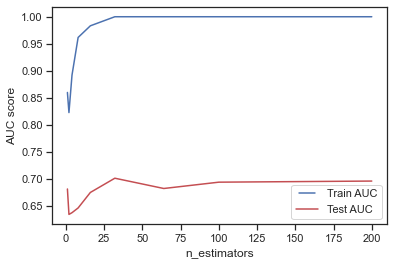

In [116]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [117]:
rfModel = RandomForestClassifier(n_estimators=60)
rfModel.fit(X_train, y_train)
y_pred = rfModel.predict(X_test)


In [118]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6995539696699375

In [119]:
rfModel.score(X_train,y_train)

1.0

In [120]:
rfModel.score(X_test,y_test)

0.7402597402597403

In [121]:
print('Accuracy of Random Forest regression classifier on test set: {:.2f}'.format(rfModel.score(X_test, y_test)))

Accuracy of Random Forest regression classifier on test set: 0.74


In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83 12]
 [28 31]]


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        95
           1       0.72      0.53      0.61        59

    accuracy                           0.74       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154



In [124]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.7209302325581395


In [125]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))


Recall score: 0.5254237288135594


AUC: 0.700


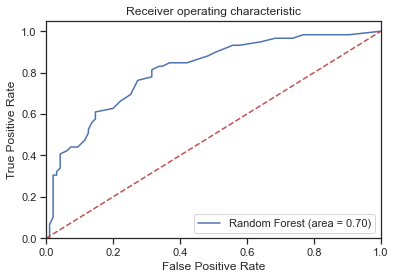

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rfModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print('AUC: %.3f' % rf_roc_auc)
plt.show()

## Model 4 : Support Vector Machine 

In [127]:
#Support Vector Classifier
from sklearn.svm import SVC
SVMmodel = SVC(kernel='rbf',
 gamma='auto')
SVMmodel.fit(X_train,y_train)

SVC(gamma='auto')

In [128]:
SVMmodel.score(X_train,y_train)

1.0

In [129]:
SVMmodel.score(X_test,y_test)

0.6168831168831169

## Model 5 : KNN Classifier 

In [130]:
 #Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=7,
 metric='minkowski',
 p = 2)
knnClassifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [131]:
knnClassifier.score(X_train,y_train)

0.8045602605863192

In [132]:
 knnClassifier.score(X_test,y_test)


0.7272727272727273

AUC: 0.739
True Positive Rate - [0.         0.10169492 0.20338983 0.40677966 0.54237288 0.61016949
 0.77966102 0.93220339 1.        ], False Positive Rate - [0.         0.01052632 0.03157895 0.10526316 0.15789474 0.27368421
 0.50526316 0.66315789 1.        ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

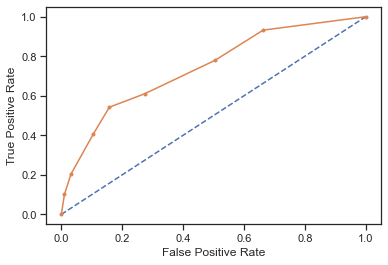

In [133]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
probs = knnClassifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [134]:
 print('Accuracy of KNN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))


Accuracy of KNN classifier on test set: 0.73


f1=0.626 auc=0.759 ap=0.762


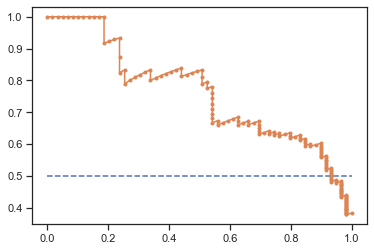

In [135]:
#Precision Recall Curve for Logistic Regression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = logRegModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = logRegModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')


f1=0.604 auc=0.661 ap=0.624


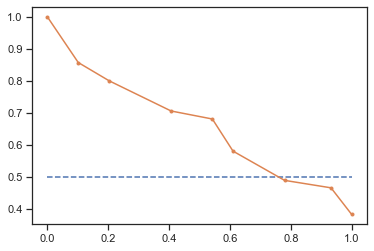

In [136]:
#Precision Recall Curve for KNN
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = knnClassifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = knnClassifier.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')


f1=0.655 auc=0.678 ap=0.571


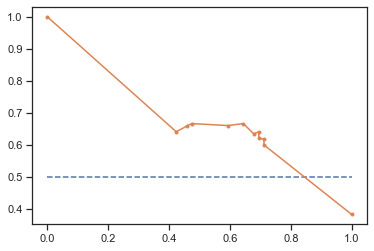

In [137]:
#Precision Recall Curve for Decission Tree Classifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = DTModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = DTModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')


f1=0.608 auc=0.698 ap=0.707


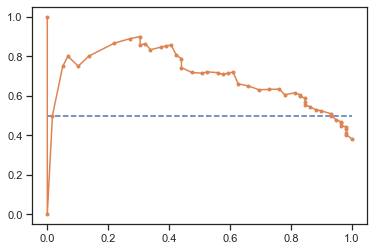

In [138]:
#Precision Recall Curve for Random Forest
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = rfModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = rfModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')


# Therefor we observed that Random Forest is best performing model for this dataset
# Accuracy of 77%
# Precision = 0.78
# Recall = 0.54
# AUC = 0.70